# **1. Simple Linear Regression**
Draws a straight line through the data to best fit the relationship between one input (x) and one output (y).

Equation: y = m*x + c

Use case: Predicting house price just from its size.

Works only when the relationship is a straight line.

**Graph meaning:** A straight line in 3D (or 2D if only one feature).

It shows that the model is trying to minimize the distance of all points from that line.

Relation: Graph matches the idea of “best fit line.”

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Sample data
np.random.seed(42)
X = np.random.rand(50, 1) * 10  # independent variable
y = 3*X.squeeze() + 7 + np.random.randn(50)*2  # dependent variable

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 3D Plot
fig = go.Figure()

# Scatter plot of actual points
fig.add_trace(go.Scatter3d(x=X.squeeze(), y=y, z=y, mode='markers',
                           marker=dict(size=5, color='cyan'), name='Actual'))

# Regression plane (as line in 3D)
fig.add_trace(go.Scatter3d(x=X.squeeze(), y=y_pred, z=y_pred, mode='lines',
                           line=dict(color='yellow', width=5), name='Prediction'))

fig.update_layout(scene=dict(
    xaxis_title='Feature',
    yaxis_title='Predicted',
    zaxis_title='Target'),
    template="plotly_dark", title="Simple Linear Regression 3D")

fig.show()


# **2. Multiple Linear Regression**
Same as simple regression, but uses more than one input (features). Instead of a line, it makes a plane or hyperplane.

Equation: y = m1*x1 + m2*x2 + ... + c

Use case: Predicting house price using size + location + number of rooms.

 Captures multiple factors together, but still assumes linear relationship.

**Graph meaning:** A plane (surface) in 3D space.

Each axis is a feature, and the plane represents the prediction.

Relation: The surface is the “multi-feature best fit” instead of just a line.

In [ ]:
from sklearn.datasets import make_regression

# Sample data
X, y = make_regression(n_samples=50, n_features=2, noise=10, random_state=42)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 3D Scatter
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y, mode='markers',
                           marker=dict(size=5, color='cyan'), name='Actual'))

# Regression plane (using meshgrid)
xx, yy = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(), 10),
                     np.linspace(X[:,1].min(), X[:,1].max(), 10))
zz = model.intercept_ + model.coef_[0]*xx + model.coef_[1]*yy
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, colorscale='Viridis', opacity=0.5, name='Prediction'))

fig.update_layout(scene=dict(xaxis_title='Feature1', yaxis_title='Feature2', zaxis_title='Target'),
                  template="plotly_dark", title="Multiple Linear Regression 3D")
fig.show()


Polynomial Regression

# **3. Polynomial Regression**

Extends linear regression by adding powers of x (like x², x³) to capture curves instead of straight lines.

Equation: y = a0 + a1*x + a2*x² + a3*x³ + ...

Use case: Predicting population growth or curved trends.

Good for curved data, but can overfit if degree is too high.

**Graph meaning:** A curved line/surface instead of straight.

It bends to capture the shape of the data (e.g., U-shape, waves).

Relation: This shows how polynomial terms (x², x³) allow the model to fit non-linear patterns.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate non-linear data
X = np.random.rand(50,1) * 6 - 3
y = X.squeeze()**3 + X.squeeze()**2 + np.random.randn(50)*3

# Transform data for polynomial regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Predict on grid
X_grid = np.linspace(X.min(), X.max(), 50).reshape(-1,1)
X_grid_poly = poly.transform(X_grid)
y_pred = model.predict(X_grid_poly)

# 3D Scatter
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X.squeeze(), y=y, z=y, mode='markers',
                           marker=dict(size=5, color='cyan'), name='Actual'))
fig.add_trace(go.Scatter3d(x=X_grid.squeeze(), y=y_pred, z=y_pred, mode='lines',
                           line=dict(color='yellow', width=5), name='Prediction'))

fig.update_layout(scene=dict(xaxis_title='Feature', yaxis_title='Predicted', zaxis_title='Target'),
                  template="plotly_dark", title="Polynomial Regression 3D")
fig.show()


# **4. Ridge & Lasso Regression**

 Both are still linear regression, but they add a penalty to reduce overfitting (when the model memorizes instead of learning).

Ridge: Shrinks coefficients (but never makes them zero).

Lasso: Shrinks coefficients and can even make some exactly zero (good for feature selection).

Use case: When you have many features and want to avoid overfitting.

Regularization = controlling complexity.

**Graph meaning:** Looks similar to multiple regression (plane), but…

Points don’t overfit too closely because penalties shrink the coefficients.

Relation: The graph is smoother / less wiggly, showing controlled fitting.

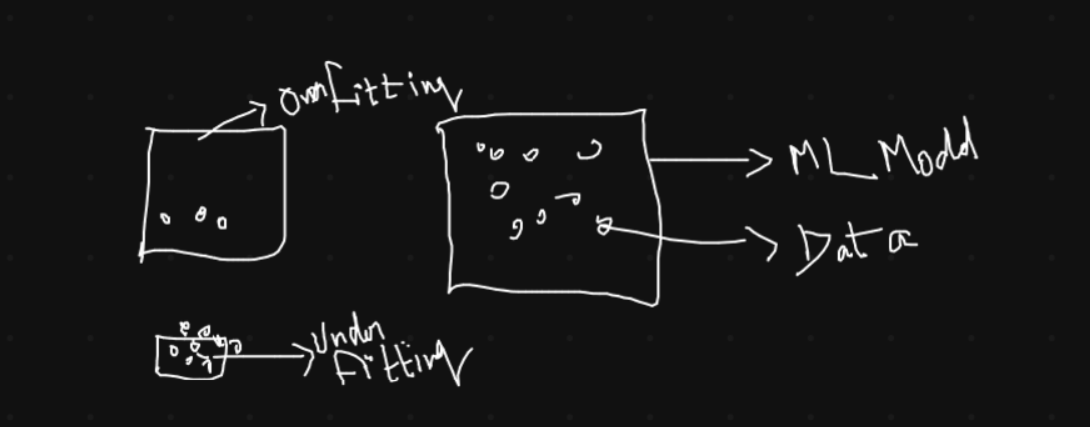

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Sample data with 2 features
X, y = make_regression(n_samples=50, n_features=2, noise=15, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_ridge = ridge.predict(X)

# Lasso Regression
lasso = Lasso(alpha=0.5)
lasso.fit(X, y)
y_lasso = lasso.predict(X)

# 3D Plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y, mode='markers',
                           marker=dict(size=5, color='cyan'), name='Actual'))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y_ridge, mode='markers',
                           marker=dict(size=4, color='yellow'), name='Ridge'))
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=y_lasso, mode='markers',
                           marker=dict(size=4, color='magenta'), name='Lasso'))

fig.update_layout(scene=dict(xaxis_title='Feature1', yaxis_title='Feature2', zaxis_title='Target'),
                  template="plotly_dark", title="Ridge & Lasso Regression 3D")
fig.show()


# **5. Support Vector Regression (SVR)**

Instead of fitting all points exactly, it tries to fit a line/curve where errors within a margin (tube) are ignored.

Concept: "I don’t care if some predictions are off, as long as they are close enough."

Use case: Stock price prediction, time series where some errors are acceptable.

Uses SVM concept (support vectors, margins). Good for non-linear with kernels.

**Graph meaning:** A line/curve with a margin (tube) around it.

Points inside the tube are “good enough,” so the model doesn’t overreact to every small variation.

Relation: The graph shows tolerance for errors → focus is on capturing the overall trend.

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.svm import SVR

# Non-linear data
X = np.sort(5 * np.random.rand(50,1), axis=0)
y = np.sin(X).ravel() + np.random.randn(50)*0.1

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X, y)
y_pred = svr_rbf.predict(X)

# 3D Plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X.squeeze(), y=y, z=y, mode='markers',
                           marker=dict(size=5, color='cyan'), name='Actual'))
fig.add_trace(go.Scatter3d(x=X.squeeze(), y=y_pred, z=y_pred, mode='lines',
                           line=dict(color='yellow', width=5), name='SVR'))

fig.update_layout(scene=dict(xaxis_title='Feature', yaxis_title='Predicted', zaxis_title='Target'),
                  template="plotly_dark", title="Support Vector Regression 3D")
fig.show()


# **6. Decision Tree Regression**

Splits data into decision rules (like “if size < 1000, price = 50k else 100k”).

Looks like: A flowchart.

Use case: Predicting things with clear decision paths (customer behavior, medical diagnosis).

Very interpretable but can overfit easily.

**Graph meaning:** A step-like curve (piecewise constant).

Instead of a smooth line, you see flat horizontal segments (like stairs).

Relation: This is because the tree splits data into bins/rules, predicting one constant value per region.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Data
X = np.sort(5 * np.random.rand(50,1), axis=0)
y = np.sin(X).ravel() + np.random.randn(50)*0.1

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X, y)
y_pred = tree.predict(X)

# 3D Plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X.squeeze(), y=y, z=y, mode='markers',
                           marker=dict(size=5, color='cyan'), name='Actual'))
fig.add_trace(go.Scatter3d(x=X.squeeze(), y=y_pred, z=y_pred, mode='lines',
                           line=dict(color='yellow', width=5), name='Decision Tree'))

fig.update_layout(scene=dict(xaxis_title='Feature', yaxis_title='Predicted', zaxis_title='Target'),
                  template="plotly_dark", title="Decision Tree Regression 3D")
fig.show()


# **Random Forest Regression(Collection of Decision Trees)**

# **7. Random Forest Regression**

Builds many decision trees on random subsets of data, then averages results.

Why better: One tree may overfit, but a forest of trees reduces error.

Use case: Sales prediction, customer churn, complex patterns.

 More accurate and stable than a single tree, but harder to interpret.

**Graph meaning:** A smoothed-out version of decision tree regression.

Each tree makes steps, but when averaged together, you get a curve that looks smoother and more accurate.

Relation: The graph shows the power of ensemble learning (many weak models → strong predictor).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Data
X = np.sort(5 * np.random.rand(50,1), axis=0)
y = np.sin(X).ravel() + np.random.randn(50)*0.1

rf = RandomForestRegressor(n_estimators=50)
rf.fit(X, y)
y_pred = rf.predict(X)

# 3D Plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X.squeeze(), y=y, z=y, mode='markers',
                           marker=dict(size=5, color='cyan'), name='Actual'))
fig.add_trace(go.Scatter3d(x=X.squeeze(), y=y_pred, z=y_pred, mode='lines',
                           line=dict(color='yellow', width=5), name='Random Forest'))

fig.update_layout(scene=dict(xaxis_title='Feature', yaxis_title='Predicted', zaxis_title='Target'),
                  template="plotly_dark", title="Random Forest Regression 3D")
fig.show()
